In [9]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

from BSE import market_session

def plot_trades(trial_id):
    prices_fname = trial_id + '_tape.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 
    
# Use this to run an experiment n times and plot all trades
def n_runs_plot_trades(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_tape.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black');

# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice    

# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def plot_sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

# plot sorted trades, useful is some situations - won't be used in this worksheet
def in_order_plot(trial_id):
    prices_fname = trial_id + '_tape.csv'
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black')   

# plot offset function
def plot_offset_fn(offset_fn, total_time_seconds):   
    x = list(range(total_time_seconds))
    offsets = []
    for i in range(total_time_seconds):
        offsets.append(offset_fn(i))
    plt.plot(x, offsets, 'x', color='black') 

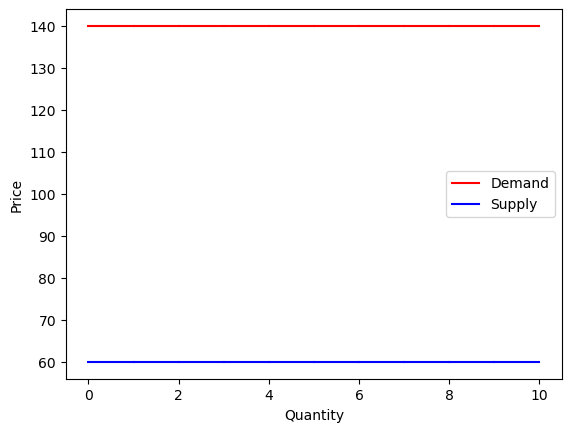

In [54]:
sup_range = (60, 60)
dem_range = (140, 140)
start_time = 0 
end_time = 60 * 60 * 24 * 5

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]
plot_sup_dem(10, [sup_range], 10, [dem_range], 'fixed')

order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': 5, 'timemode': 'drip-poisson' }

In [28]:
print(trial_id)

pula_mea


In [55]:
buyers_spec = [('PRDE_EXP', 10, {'k': 5, 's_min': -1.0, 's_max': +1.0, 'F': 2.0}),
('PRDE', 10, {'k': 4, 's_min': -1.0, 's_max': +1.0, 'F': 0.8})]
sellers_spec = buyers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}

In [69]:
tdump=open('new.csv','w')
trial_id = 'pula_mea'
dump_all = True
verbose = False

In [62]:
market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)


B00: PRDE_EXP active_strat=[0]:
[0]: s=+0.832680, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.234995, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.536114, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.980075, start=0.000000, $=0.000000, pps=0.000000
[4]: s=-0.489768, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE_EXP active_strat=[0]:
[0]: s=-0.245489, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.087097, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.896166, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.841538, start=0.000000, $=0.000000, pps=0.000000
[4]: s=+0.760234, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE_EXP active_strat=[0]:
[0]: s=-0.231899, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.067973, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.101084, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.150699, start=0.000000, $=0.000000, pps=0.000000
[4]: s=-0.963467, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE_EXP

In [72]:
sum_prde_buy = 0
sum_exp_buy = 0
sum_prde_sell = 0
sum_exp_sell = 0
nr_trader = 0
y_prde = np.empty(0)
y_exp = np.empty(0)
y_prde_buy = np.empty(0)
y_prde_sell = np.empty(0)
y_exp_buy = np.empty(0)
y_exp_sell = np.empty(0)
x = np.empty(0)
            
with open(trial_id + '_exp.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        time = float(row[0])
        sum_prde_buy += float(row[1])
        sum_prde_sell += float(row[2])
        sum_exp_buy += float(row[3])
        sum_exp_sell += float(row[4]) 
        nr_trader += 1
        x = np.append(x, time)
        y_prde_buy = np.append(y_prde_buy, sum_prde_buy/nr_trader)
        y_prde_sell = np.append(y_prde_sell, sum_prde_sell/nr_trader)
        y_exp_buy = np.append(y_exp_buy, sum_exp_buy/nr_trader)
        y_exp_sell = np.append(y_exp_sell, sum_exp_sell/nr_trader)

        y_prde = np.append(y_prde, (sum_prde_buy+ sum_prde_sell)/nr_trader)
        y_exp = np.append(y_exp, (sum_exp_buy + sum_exp_sell)/nr_trader)

In [52]:
y_exp[-2]

111.02830266486392

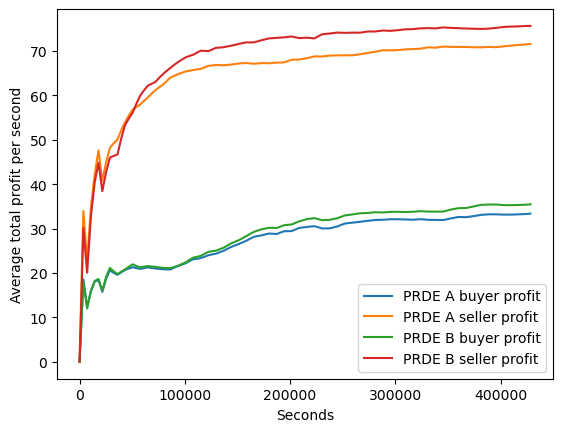

In [75]:
fig, ax = plt.subplots()

plt.plot(x, y_prde_buy)
plt.plot(x, y_prde_sell)
plt.plot(x, y_exp_buy)
plt.plot(x, y_exp_sell)
ax.set_xlabel('Seconds')
ax.set_ylabel('Average total profit per second')
ax.legend(['PRDE A buyer profit', 'PRDE A seller profit', 'PRDE B buyer profit', 'PRDE B seller profit'])


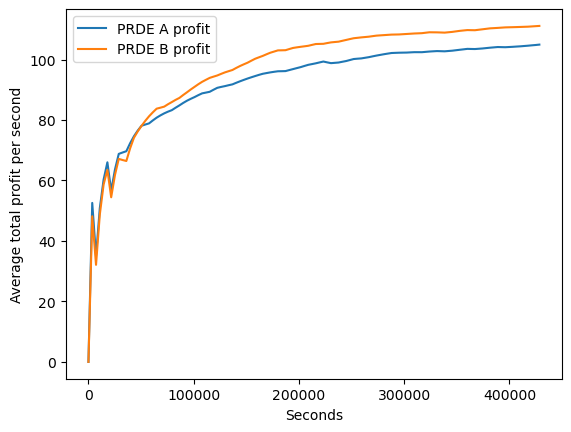

In [76]:
fig, ax = plt.subplots()
plt.plot(x, y_prde)
plt.plot(x, y_exp)
ax.set_xlabel('Seconds')
ax.set_ylabel('Average total profit per second')
#ax.legend(['PRDE-default buyer profit', 'PRDE-default seller profit', 'PRDE-exp buyer profit', 'PRDE-exp seller profit'])
ax.legend(['PRDE A profit', 'PRDE B profit'])

In [82]:
print(y_prde[-1])
print(y_exp[-1])

x = y_exp[-1] * 100 / y_prde[-1]
print(x)

104.92842285857206
111.11038181944578
105.8915961876279


In [88]:
# Multiple trials with best configuration.
sup_range = (60, 60)
dem_range = (140, 140)
start_time = 0 
end_time = 60 * 60 * 24 * 5

supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [sup_range], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [dem_range], 'stepmode': 'fixed'}]
#plot_sup_dem(10, [sup_range], 10, [dem_range], 'fixed')
order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': 5, 'timemode': 'drip-poisson' }

trial = 0
k = 4
F = 1.7
list_exp = np.empty(0)
list_prde = np.empty(0)

while (trial < 30):
    trial_id = f'best1_exp_k={k}_F={F}_trail={trial}'
    buyers_spec = [('PRDE_EXP', 10, {'k': k, 's_min': -1.0, 's_max': +1.0, 'F': F}),
        ('PRDE', 10, {'k': 4,'s_min': -1.0, 's_max': +1.0, 'F': 0.8})]            
    sellers_spec = buyers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
            
    market_session(trial_id, start_time, end_time, traders_spec, order_sched, tdump, dump_all, verbose)
            
    sum_prde_buy = 0
    sum_exp_buy = 0
    sum_prde_sell = 0
    sum_exp_sell = 0
    nr_trader = 0
    y_prde = np.empty(0)
    y_exp = np.empty(0)
            
    with open(trial_id + '_exp.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[0])
            sum_prde_buy += float(row[1])
            sum_prde_sell += float(row[2])
            sum_exp_buy += float(row[3])
            sum_exp_sell += float(row[4]) 
            nr_trader += 1
            y_prde = np.append(y_prde, (sum_prde_buy+ sum_prde_sell)/nr_trader)
            y_exp = np.append(y_exp, (sum_exp_buy + sum_exp_sell)/nr_trader)

    list_exp = np.append(list_exp, y_exp[-1])
    list_prde = np.append(list_prde, y_prde[-1])

    trial += 1


B00: PRDE_EXP active_strat=[0]:
[0]: s=-0.604183, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.338470, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.290892, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.586689, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE_EXP active_strat=[0]:
[0]: s=+0.493941, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.481077, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.738117, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.184041, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE_EXP active_strat=[0]:
[0]: s=+0.953309, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.912748, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.061150, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.727883, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE_EXP active_strat=[0]:
[0]: s=-0.440857, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.989221, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.044357, start=0.000000, $=0.00

In [89]:
list_exp

array([ 97.02745824, 100.79612436, 115.20708983,  96.87921161,
       108.54114204, 102.72862674, 102.77268688, 101.7204435 ,
       104.16081134, 101.49424177, 100.17815688, 100.33357584,
        92.59494173, 100.65303386, 100.84869825, 100.86698022,
        98.87221082, 103.85745178, 106.18837713, 106.26840726,
        97.73301222, 105.38430524,  97.77700991, 107.45669733,
       102.4637966 , 108.53446405, 100.89005544, 102.57022277,
       113.07435471,  99.43882754])

In [90]:
list_prde

array([101.61246084, 103.75809209, 105.46943556,  96.64868112,
       101.79709332,  98.80225924, 107.64769183,  95.934652  ,
        95.05636205,  98.29004502,  92.70344832, 105.61955967,
        94.3553258 , 104.24845986, 100.40831645, 102.29330944,
       102.69614078,  98.3301943 ,  98.40431366, 103.54247783,
       108.28095418,  94.38516568, 101.68416105,  96.0766632 ,
       103.81798343, 107.44840069, 104.87092831, 103.88259463,
       109.29423194,  94.13716396])

In [4]:
merged_list_exp =  [97.02745824, 100.79612436, 115.20708983,  100.87921161,108.54114204, 102.72862674, 102.77268688, 101.7204435 ,104.16081134, 101.49424177, 100.17815688, 100.33357584,92.59494173, 100.65303386, 100.84869825, 100.86698022,98.87221082, 103.85745178, 106.18837713, 106.26840726,100.73301222, 105.38430524,  99.77700991, 107.45669733,
       102.4637966 , 108.53446405, 100.89005544, 102.57022277,
       113.07435471,  99.43882754, 101.79435133, 107.51030151, 106.0034556 , 103.14273608,
       96.78788355,  95.75776025,  99.29406044, 102.19430975,
       101.20962855, 107.10511501,  99.4225241 , 107.65234994,
       100.53640796,  105.91531015, 100.11474912,  109.43543339,
       100.80719094, 104.24307408, 104.63526201, 106.83702824,
       101.89574534, 106.34245811,  90.63236844, 105.61614779,
       104.69270872, 107.10932252, 104.34770114, 115.39063571,
       97.74121945, 106.0650797, 103.56594368,  93.47938618,  98.00296531,  99.44004414,105.50933682,  96.69974593,  86.96830452, 106.40654435,
       101.3547718 , 105.90592507,  104.76683831,  98.20440552,
       106.40710093, 103.54224562,  99.56872269, 101.83343741,
       114.3206304 , 109.20666747,  98.44061958, 101.97196206,
       110.22453729, 104.09562649, 110.42991831, 100.55569087,
       105.02416472,  108.92766494,  99.91024799, 107.61414228,
       110.70336457,  113.71794081, 102.23744479, 102.85358658, 101.65301291,  96.54795773,
       100.09368029,  109.99515429,  110.97008693, 111.8839282 ,
       109.3250652 ,  99.64873447,  100.55087656,  100.46382239,
       100.87689678, 100.89694743,  109.223078  , 104.75314281,
       104.55363191,  105.92918222,  91.905452  , 105.75908877,
       103.23399416,  98.07537685, 114.24840583,  99.9767536 ,
       106.3144183 ,  109.42617961, 101.82650741, 102.6130772 ,98.40652584, 104.46742005, 102.13032194,  94.60218236,  95.81594659,  94.87613694,98.20652469, 110.53290071,  99.75782633, 109.25924938,
       111.30438351, 103.63932035, 103.03958893, 110.45830284,
       111.7959969 , 106.07811182, 107.06684614, 108.28343754,
       106.03316681,  109.40620242, 111.7529021 ,  112.42418557,109.08171581, 104.90659799, 113.73087217, 101.76481585,
       106.86453761, 109.85585597, 106.46191339, 105.35236467,
       106.33360384, 105.08446296, 94.68741302, 102.98058768, 103.78830031, 100.03526934,
       104.5947617 , 110.61662635, 111.47157367, 103.3970088 ,
       104.82983482,  112.44763751, 113.49461174, 101.70970499,
       102.14813442, 108.69366845, 108.10426819,  109.86830624,
       111.75023812, 101.23110754, 108.33886755, 108.41595082,
       105.79384765,  98.83397929, 104.29218989,  90.68440958,98.56711765, 105.9064302 , 105.09480156, 108.36634902,
       103.78261163, 102.42329025]

len(merged_list_exp)

180

In [5]:
merged_list_prde = [101.61246084, 103.75809209, 105.46943556,  96.64868112,
       101.79709332,  98.80225924, 107.64769183,  95.934652  ,
        95.05636205,  98.29004502,  92.70344832, 105.61955967,
        94.3553258 , 104.24845986, 100.40831645, 102.29330944,
       102.69614078,  98.3301943 ,  98.40431366, 103.54247783,
       108.28095418,  94.38516568, 101.68416105,  96.0766632 ,
       103.81798343, 107.44840069, 104.87092831, 103.88259463,
       109.29423194,  94.13716396, 109.35869522,  98.17915775, 102.78597896, 102.15360493,
       100.4833422 ,  96.15412224, 106.71597878,  98.78750906,
       110.28296691, 111.61507898, 100.48858582, 114.47761122,
        91.87788115,  99.15066569,  97.71157825,  98.99314322,
       101.86420201, 112.42719006, 113.91637633, 105.67803739,
        94.86403939, 104.70580002,  98.59748902,  99.91900578,
       104.30312946, 107.1876495 ,  99.6259354 , 108.10458689,
       102.34652658, 98.62587422, 101.0465142 , 103.12331894,  96.95100907, 106.91831469,
        95.05419528,  98.76241585, 103.55777742, 104.95216748,
        92.40263402, 101.36109048,  98.10845871, 104.99214069,
       103.65111806,  92.26407533, 101.12562501, 107.29466353,
        99.77823674, 102.6482249 , 101.65178618,  98.82568992,
       112.22138296,  97.714605  , 107.01200449, 103.12317224,
       106.84716037,  98.74180757, 100.87615866, 110.50682281,
       110.53525678,  98.82552512, 95.06025644, 106.03299368,  89.02085835,  96.92593968,
        98.93393334, 105.67729606, 100.09689882, 105.47037883,
       104.40241172,  96.09049703, 102.38827201, 101.67174015,
        95.76463215, 102.09974675,  99.13127037, 102.23088597,
        98.28626427, 105.04572672, 109.40129264, 110.47477112,
        99.14414729, 101.82034454, 100.92454527,  93.50755374,
       103.54539689, 102.28344634, 102.61195775, 102.25446119,
       104.8755074 ,  99.37065122, 101.54758538,  98.98295548, 97.45329843, 104.9288299 ,
        99.42706925,  98.97710607,  89.23277722, 113.06433928,
       107.05660736, 109.91293826,  88.8624481 , 111.25417809,
       108.59390653, 100.61459242, 107.44206514, 107.69642335,
        92.60425236,  95.47701308, 104.9872531 , 109.72751872,
       111.17743057, 105.77432937, 100.98457423, 101.94798106,
       102.78308677, 109.16293006, 108.41007737, 106.34138265,
        95.29050728, 104.10674618, 103.35897545, 107.10593007, 99.04891927, 102.863175  ,
       91.44369301, 108.51702163, 105.10719465, 103.47456938,
        96.83049685, 104.38726083, 90.75281661,  99.27767397,
        92.37336538,  94.32418423, 94.78509791,  95.92022145,
        97.83080606, 93.8595965 , 96.89982215, 99.8034638 ,
        93.45195439, 95.07081982,  98.04205049, 100.23105316,
        99.57991076, 104.43844737, 105.43405837, 101.99324104,
       99.66804528, 103.58044463]
len(merged_list_prde)

180

In [2]:
# import some useful libraries to help us wrangle data, 
# plot data, and perform statistial analysis 
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

In [179]:
pd.DataFrame(data={'model1': merged_list_exp, "model2": merged_list_prde})

,model1,model2
0,97.027458,101.612461
1,100.796124,103.758092
2,115.207090,105.469436
3,100.879212,96.648681
4,108.541142,101.797093
...,...,...
175,105.906430,104.438447
176,105.094802,105.434058
177,108.366349,101.993241
178,103.782612,99.668045


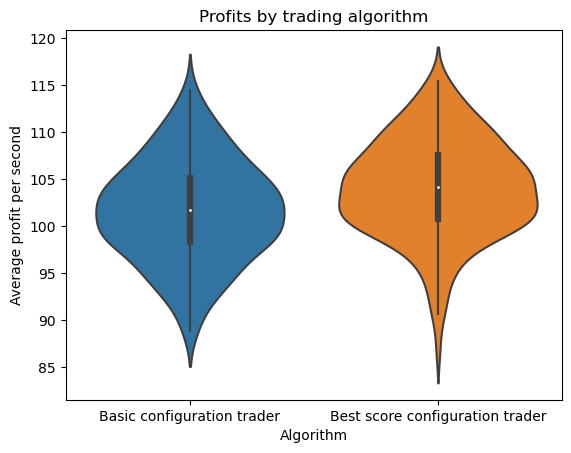

In [19]:
# Use seaborn to create a violin plot

ax = sns.violinplot(data=pd.DataFrame(data={"Basic configuration trader": merged_list_prde, 'Best score configuration trader': merged_list_exp}), inner='box')

# Label our axes appropriately
ax.set_title("Profits by trading algorithm")
ax.set_ylabel("Average profit per second")
ax.set_xlabel("Algorithm")

plt.show()

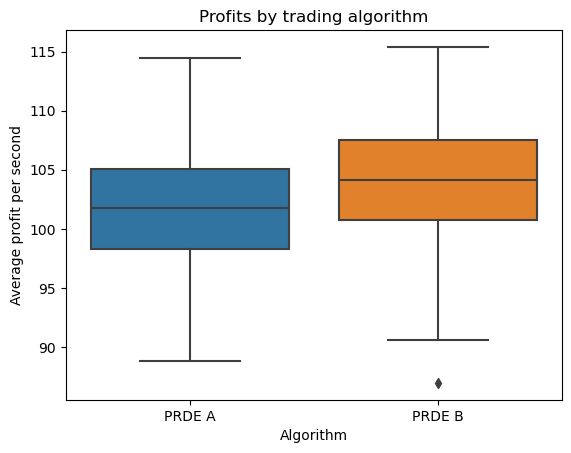

In [20]:
ax = sns.boxplot(data=pd.DataFrame(data={"PRDE A": merged_list_prde, "PRDE B": merged_list_exp}))
ax.set_title("Profits by trading algorithm")
ax.set_ylabel("Average profit per second")
ax.set_xlabel("Algorithm")
plt.show()

In [14]:
np.mean(merged_list_exp)

104.0239012893889

In [117]:
np.mean(merged_list_prde)

102.40317917488889

<AxesSubplot:>

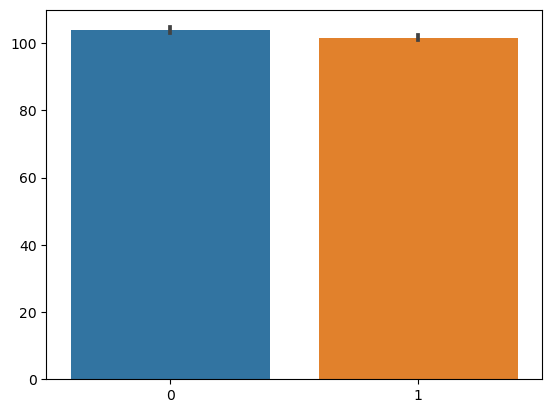

In [128]:
sns.barplot(data=[merged_list_exp, merged_list_prde])


Text(0.5, 0, 'Profit')

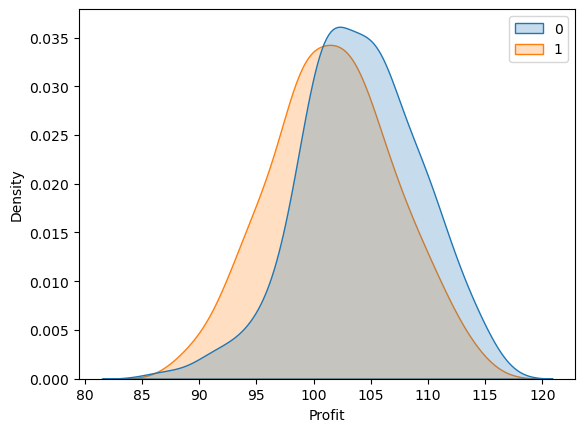

In [21]:
ax = sns.kdeplot(data=[merged_list_exp, merged_list_prde], fill=True)
ax.set_xlabel("Profit")


In [12]:
len(merged_list_exp)

180

In [162]:
#k = 4
dict_k4 = {0.1: 97.87724850461763, 0.2: 95.1600872058829, 0.3: 99.46505669715323, 0.4: 98.51640697923045, 0.5: 96.67271188366446, 0.6: 99.70331176818566, 0.7: 100.66481668155575, 0.8: 100.19326340144319, 0.9: 100.60709278418612, 1.0: 99.67005697888617, 1.1: 103.30497456351812, 1.2: 103.88379898360608, 1.3: 98.50590868479973, 1.4: 97.76394519286713, 1.5: 105.18131559876429, 1.6: 104.11222588371088, 1.7: 108.30899317453816, 1.8: 104.5045302255532, 1.9: 105.41505693835886, 2.0: 104.98380581521197}
dict_k5 = {0.1: 100.70657967838675,
 0.2: 101.05341016964807,
 0.3: 103.1163008084964,
 0.4: 101.81276409908571,
 0.5: 98.39919635405461,
 0.6: 98.18308823833604,
 0.7: 106.4174151486694,
 0.8: 96.08457993364046,
 0.9: 101.29183398621943,
 1.0: 100.82592404342729,
1.1: 102.28680720001212,
 1.2: 101.87680328446321,
 1.3: 102.55895096788954,
 1.4: 101.01389821385436,
 1.5: 103.03799496525222,
 1.6: 104.52160909035341,
 1.7: 105.67473218360942,
 1.8: 100.50570683730011,
 1.9: 105.47040463975445,
 2.0: 108.27555769538975}
dict_k6 = {0.1: 100.91983499182793,
 0.2: 99.35165801888782,
 0.3: 105.93652544180105,
 0.4: 99.48159472241865,
 0.5: 100.81394729590359,
 0.6: 103.81857136502337,
 0.7: 99.62864551840437,
 0.8: 102.907567573155,
 0.9: 102.25071637566445,
 1.0: 103.64370235701249,
1.1: 101.91786492478975,
 1.2: 102.75868273172723,
 1.3: 104.41700075428281,
 1.4: 100.06176762312049,
 1.5: 97.74172503902696,
 1.6: 100.82489787435541,
 1.7: 98.6170630648196,
 1.8: 103.47800128081447,
 1.9: 99.80524162613358,
 2.0: 99.86674514015492
}
#df_hm = pd.DataFrame.from_dict(dict_k4)



[Text(0.5, 23.52222222222222, 'F'), Text(50.722222222222214, 0.5, 'k')]

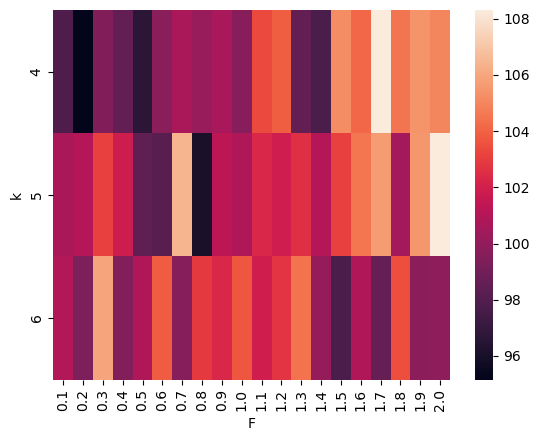

In [167]:
hm = sns.heatmap(pd.DataFrame([dict_k4, dict_k5, dict_k6], columns=dict_k4.keys(), index=['4', '5', '6']))
hm.set(xlabel='F', ylabel='k')


In [17]:
# Shapiro-Wilk test tests the null hypothesis that 
# the data was drawn from a normal distribution

print("Using Shapiro-Wilk test to test the null hypothesis " +
      "that the data was drawn from a normal distribution:")

statistic, pvalue = stats.shapiro(merged_list_exp)
if pvalue < 0.05:
      print("Condition " + "{:}" + 
            ". We can reject the null hypothesis (p=" + 
            "{:.2f}".format(pvalue) + 
            "). Therefore, data is not normally distributed.")
else:
        print("Condition " + "{:}" + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

print(pvalue)

Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:
Condition {:}. We cannot reject the null hypothesis (p=0.27). Therefore, data is normally distributed.
0.2745380699634552


In [18]:
# Shapiro-Wilk test tests the null hypothesis that 
# the data was drawn from a normal distribution

print("Using Shapiro-Wilk test to test the null hypothesis " +
      "that the data was drawn from a normal distribution:")

statistic, pvalue = stats.shapiro(merged_list_prde)
if pvalue < 0.05:
      print("Condition " + "{:}" + 
            ". We can reject the null hypothesis (p=" + 
            "{:.2f}".format(pvalue) + 
            "). Therefore, data is not normally distributed.")
else:
        print("Condition " + "{:}" + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

print(pvalue)

Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:
Condition {:}. We cannot reject the null hypothesis (p=0.77). Therefore, data is normally distributed.
0.7731002569198608


In [16]:
# Use stats package from scipy to perform ANOVA 
statistic, pvalue = stats.f_oneway(merged_list_exp, merged_list_prde)
if pvalue < 0.05:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

ANOVA: (p=0.00 < 0.05). Reject null. The groups have a different population mean.


In [28]:
#T-test - check if the result is said to be statically significant
pvalue = stats.ttest_ind(merged_list_exp, merged_list_prde).pvalue

print(pvalue < 0.05)
print(pvalue)

True
2.0189753383150562e-05
